In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *
from google.colab import drive
drive.mount('/content/drive')

     |████████████████████████████████| 727kB 3.9MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 1.1MB 37.8MB/s 
     |████████████████████████████████| 194kB 43.2MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 92kB 10.0MB/s 
     |████████████████████████████████| 40kB 6.1MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
     |████████████████████████████████| 2.6MB 43.6MB/s 
Mounted at /content/gdrive
Mounted at /content/drive


In [2]:

path = Path ('/content/drive/My Drive/Dataset/CovidDataset')

In [3]:
Path.BASE_PATH = path 

(path/'Train/Covid').ls()

(#112) [Path('Train/Covid/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg'),Path('Train/Covid/nejmoa2001191_f5-PA.jpeg'),Path('Train/Covid/16669_3_1.jpeg'),Path('Train/Covid/covid-19-pneumonia-evolution-over-a-week-1-day0-PA.jpg'),Path('Train/Covid/F63AB6CE-1968-4154-A70F-913AF154F53D.jpeg'),Path('Train/Covid/1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg'),Path('Train/Covid/1-s2.0-S1684118220300608-main.pdf-001.jpg'),Path('Train/Covid/covid-19-pneumonia-7-PA.jpg'),Path('Train/Covid/covid-19-pneumonia-34.png'),Path('Train/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4b.png')...]

A Positive CoVID XRAY


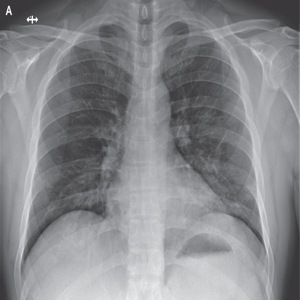

In [4]:
img_files = get_image_files(path/'Train/Covid')
im = PILImage.create(img_files[1])
newsize = (300, 300) 
im1 = im.resize(newsize) 
print("A Positive CoVID XRAY")
im1

In [5]:
(path).ls()

(#2) [Path('Train'),Path('Val')]

In [6]:
XRAYS = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(train_name='Train', valid_name='Val'),
                 get_y=parent_label,
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))


In [7]:
dls = XRAYS .dataloaders(path)

In [8]:
# GrandparentSplitter??

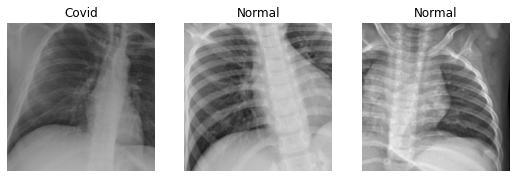

In [9]:
dls.show_batch(nrows=1, ncols=3)

In [10]:

learn = cnn_learner(dls, resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [11]:
# doc(learn.fit_one_cycle)
# learn.fit_one_cycle??

In [12]:
# doc(learn.fine_tune)
# learn.fine_tune??

In [13]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.015996,0.940821,0.400000,02:04


epoch,train_loss,valid_loss,error_rate,time
0,0.198179,0.366666,0.166667,00:11
1,0.130088,0.096201,0.066667,00:11


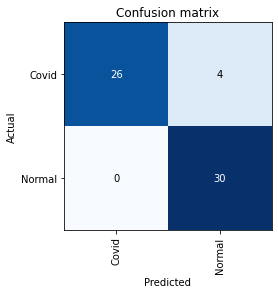

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [15]:
# from fastai.vision.widgets import *
# cleaner = ImageClassifierCleaner(learn)
# cleaner

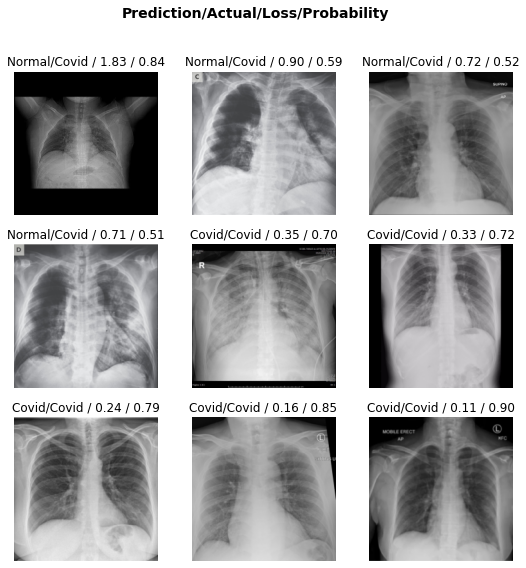

In [16]:
interp.plot_top_losses(9)

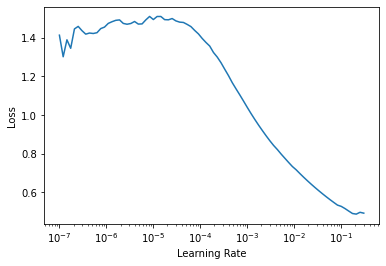

In [17]:
learning_rate_finder = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learning_rate_finder.lr_find()

In [18]:
print(f"Minimum/10: {lr_min:.4e}, steepest point: {lr_steep:.4e}")

Minimum/10: 2.0893e-02, steepest point: 3.9811e-04


In [19]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3.9811e-04)


epoch,train_loss,valid_loss,error_rate,time
0,1.174862,2.384043,0.500000,00:11
1,0.894450,0.552546,0.233333,00:11
2,0.672888,0.268216,0.083333,00:11


In [20]:
#Model is doing slightly better after training the last few layers alone with the given learning rate. Now we can unfreeze the model and find a new learning rate that we can use to train the final layers of the model again  

In [20]:

learn.predict('/content/drive/MyDrive/Dataset/Test/covidpositive.png')

# ('Covid', tensor(0), tensor([9.9934e-01, 6.5704e-04]))
# THis was my output, this means the object was predicted as a covid XRAY with 99.434% confidence 


path = Path('/content/drive/MyDrive/Dataset')
path.ls()
learn.export(Path('/content/drive/MyDrive/Dataset/Covid_XRAY_BASED_PREDICTOR_0.066667.pkl'))

SuggestedLRs(lr_min=0.0006309573538601399, lr_steep=9.12010818865383e-07)

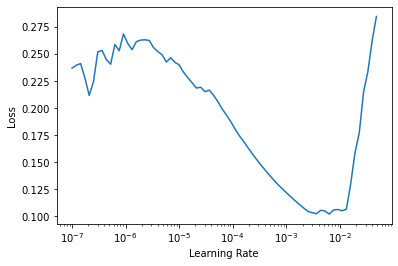

In [21]:
# doc(learn.fit_one_cycle)
learn.unfreeze()

#At this point we have trained the final few layers of our model to be more appropriate for our usecase.Since 
#the other layers are used for image predicition in general. Now we shall unfreeze the other layers 
#and apply the learning rate to the model as a whole


learn.lr_find()


In [22]:

learn.fit_one_cycle(6, lr_max=0.0006309573538601399)
# get the point of the graph where the loss increases again, then divide it by 10
# that's the new lr


epoch,train_loss,valid_loss,error_rate,time
0,0.229899,0.020246,0.000000,00:12
1,0.122363,0.015983,0.000000,00:12
2,0.080448,0.007299,0.000000,00:11
3,0.065994,0.007961,0.000000,00:12
4,0.051824,0.000853,0.000000,00:11
5,0.044907,0.000506,0.000000,00:11


In [23]:

learn.export(Path('/content/drive/MyDrive/Dataset/Covid_XRAY_Final.pkl'))